# Keras Tutorial 
- See https://keras.io


In [1]:
import keras
keras.__version__

Using TensorFlow backend.
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: Future

'2.2.4'

In [2]:
import numpy

## 1. Dataset

We will use a build-in data 'MNIST' which is a handwritten digit number image from 0 to 9

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Type of dataset

In [6]:
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


### Type of value in the dataset

In [7]:
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### Shape

In [8]:
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


### Dimension

In [9]:
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


### Characteristic of data 

In [10]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

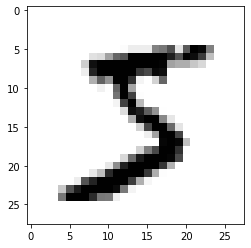

In [11]:
digit = train_images[0]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 2. Create a fully-connect neural network model

In [13]:
from keras import models
from keras import layers

In [14]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(512,activation='sigm'))
# network.add(layers.Dense(10, activation='softmax'))

In [15]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

W0915 23:21:33.341859 4605220288 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0915 23:21:33.367826 4605220288 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [16]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 3. Preprocessing Data

In [15]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [16]:
from keras.utils import to_categorical

In [17]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [18]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
test_labels.shape

(10000, 10)

## 4. Train Model

เอาข้อมูลมาแบ่งเป็น test และ train และเอา train มาแบ่งเป็นสองส่วนคือ train กับ validation 

In [20]:
history = network.fit(train_images,train_labels,epochs=5,batch_size=128,validation_split=0.1)

W0915 18:18:23.437157 4407150016 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0915 18:18:23.496576 4407150016 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 4s 75us/step - loss: 0.2752 - acc: 0.9207 - val_loss: 0.1185 - val_acc: 0.9658
Epoch 2/5
54000/54000 [==============================] - 4s 69us/step - loss: 0.1118 - acc: 0.9671 - val_loss: 0.0828 - val_acc: 0.9768
Epoch 3/5
54000/54000 [==============================] - 4s 71us/step - loss: 0.0732 - acc: 0.9782 - val_loss: 0.0760 - val_acc: 0.9770
Epoch 4/5
54000/54000 [==============================] - 4s 69us/step - loss: 0.0530 - acc: 0.9841 - val_loss: 0.0742 - val_acc: 0.9792
Epoch 5/5
54000/54000 [==============================] - 4s 70us/step - loss: 0.0391 - acc: 0.9882 - val_loss: 0.0644 - val_acc: 0.9798


## 5. Evaluate Model

In [21]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

10000/10000 [==============================] - 0s 28us/step
Test Loss: 0.06259829165441916
Test Accuracy: 0.9818


In [22]:
history.history

{'val_loss': [0.11848880362510682,
  0.08276926813522975,
  0.07600018219153086,
  0.07423914854228497,
  0.06435669744511445],
 'val_acc': [0.9658333328564962,
  0.9768333328564962,
  0.9769999995231629,
  0.9791666663487752,
  0.9798333334922791],
 'loss': [0.27522631840794176,
  0.11184555400963182,
  0.0731959317414849,
  0.052952228570977845,
  0.03906365716816099],
 'acc': [0.9206851851498639,
  0.9671296296472902,
  0.9782407406877588,
  0.9840740740210921,
  0.9882037037037037]}